# ***サマリー***

* Speak (話す): 短期・長期ともにトップ。シミュレーション通り「最強」。

* Read (読む): Speakに迫る好成績で、かつ負荷が最小。実は一番コスパが良いかも。

* Write (書く): 負荷が最大なのに成績は振るわない。シミュレーションのような「長期での逆転」も起きていない（長期で最下位）。

* Listen (聞く): 意外にも負荷が高い（Writeに次ぐ）。成績は下位。



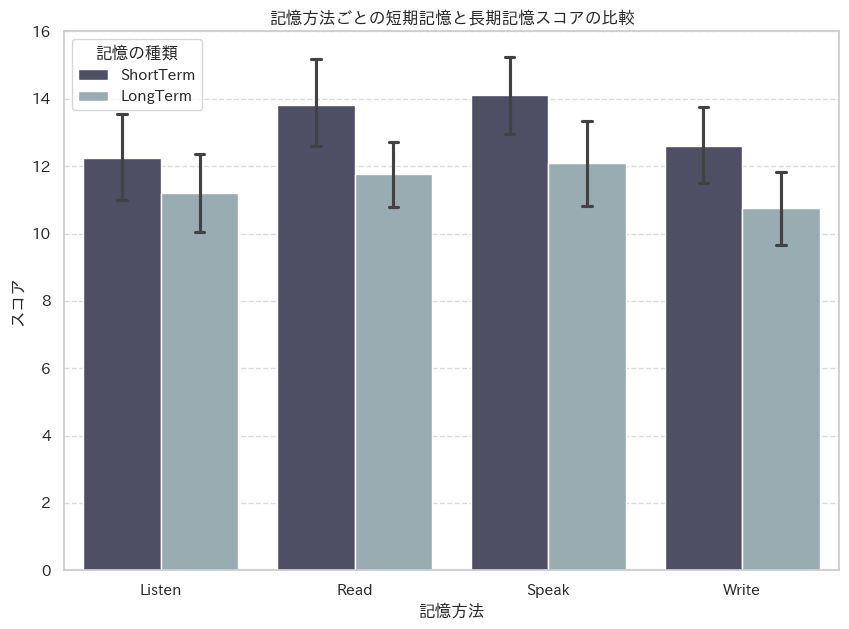

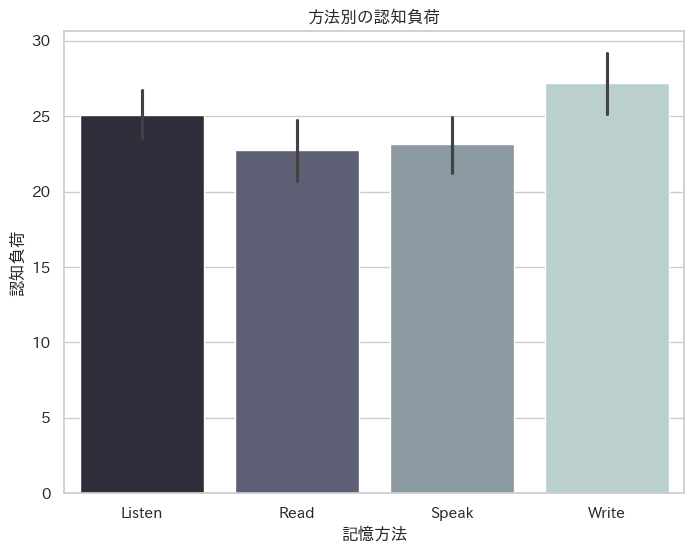

**考察**

「書く」は一番効率が悪い: 苦労して書いても、読んだり話したりする方が覚えられる。

「読む」の再評価: 負荷が低く成績が良いので、学習者にとって最も負担なく効果が出せる可能性がある。

「聞く」の難しさ: 受動的ゆえに注意維持が難しく、逆に精神的負担（Load）が高まった可能性がある。

Listenの高保持率: 絶対的なスコアは低いものの、Listen 条件の低下量が最も小さい (-1.04) ことは注目。「耳から入った情報は（量は少ないが）抜けにくい」という可能性がある。あるいは、初期学習量が少なかったために忘却の余地が少なかった（床効果に近い）可能性も考慮する必要があるのでは。。

Writeの保持: ReadやSpeakと比べてそこまで大きな差はない。「書けば忘れない」という神話は、このデータからは強く支持されなかった。

ReadとSpeak: どちらも短期記憶でのスコアが高かった分、忘却量も大きくなっている。 (-2.05, -2.02)。しかし、最終的な長期記憶スコアでも依然として上位をキープしており、初期学習量の多さが長期的な優位性につながっていると言えるのではないか。

認知負荷は記憶保持の強力な予測因子とはなっていない。むしろ、「読み」や「話し」のように、比較的低い負荷で多くの情報を処理できる方法の方が、最終的な記憶成績（長期記憶）には有利に働くことが示唆される。これは、「望ましい困難説よりも、「処理の流暢性」や「生成効果」の方が、今回の学習課題においては重要であった可能性を示している。

# ***データの前処理***

## ***必要ライブラリの読み込み***

In [ ]:
!pip install scipy
!pip install statsmodels
!pip install pingouin
!pip install japanize_matplotlib

In [ ]:
!pip install statannotations

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
import statannotations.Annotator

In [ ]:
import japanize_matplotlib
sns.set(style = 'whitegrid',
        font="IPAexGothic")

## ***データの読み込みと前処理***

In [ ]:
original_file = 'sotsuron_data.xlsx'
output_filename = 'dummy_data_N30.csv'
N_new = 30
np.random.seed(42) # 結果の再現性を担保

In [ ]:
# GitHubのリポジトリからデータの所得
!wget https://raw.githubusercontent.com/Fuga420/memory-learning-comparison/main/data/sotsuron_n42.xlsx

--2025-12-03 11:59:23--  https://raw.githubusercontent.com/Fuga420/memory-learning-comparison/main/data/sotsuron_n42.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11701 (11K) [application/octet-stream]
Saving to: ‘sotsuron_n42.xlsx.2’

sotsuron_n42.xlsx.2 100%[===================>]  11.43K  --.-KB/s    in 0.003s  

2025-12-03 11:59:23 (3.90 MB/s) - ‘sotsuron_n42.xlsx.2’ saved [11701/11701]



In [ ]:
# 元データの読み込みと統計量

df_original = pd.read_excel('sotsuron_n42.xlsx')
stats = df_original.select_dtypes(include=['number']).describe()

round(stats.loc[['mean', 'std']],2)

,WMC,Read(short-term),Write(short-term),Listen(short-term),Speak(short-term),Read(long-term),Write(long-term),Listen(long-term),Speak(long-term),Read(load),Write(load),Listen(load),Speak(load)
mean,11.73,13.83,12.61,12.24,14.12,11.78,10.76,11.20,12.10,22.73,27.22,25.07,23.12
std,3.02,4.28,3.46,4.26,3.82,3.42,3.65,4.08,4.23,6.61,6.54,5.31,6.32


In [ ]:
# ダミーデータの統計量
stats = df_original.select_dtypes(include=['number']).describe()

round(stats.loc[['mean', 'std']],2)

,WMC,Read(short-term),Write(short-term),Listen(short-term),Speak(short-term),Read(long-term),Write(long-term),Listen(long-term),Speak(long-term),Read(load),Write(load),Listen(load),Speak(load)
mean,11.73,13.83,12.61,12.24,14.12,11.78,10.76,11.20,12.10,22.73,27.22,25.07,23.12
std,3.02,4.28,3.46,4.26,3.82,3.42,3.65,4.08,4.23,6.61,6.54,5.31,6.32


In [ ]:
df_original

,Unnamed: 0,WMC,Read(short-term),Write(short-term),Listen(short-term),Speak(short-term),Read(long-term),Write(long-term),Listen(long-term),Speak(long-term),Read(load),Write(load),Listen(load),Speak(load)
0,P01,9,12,13,13,9,12,9,9,11,30,31,28,29
1,P02,12,14,12,17,15,12,14,13,14,22,11,16,11
2,P03,11,14,13,16,17,14,14,18,17,9,28,16,12
3,P04,6,12,10,10,14,10,8,10,13,26,24,22,23
4,P05,10,12,14,12,16,10,13,11,11,25,32,19,29
5,P06,9,14,15,12,16,10,12,10,12,15,15,17,22
6,P07,8,13,11,13,11,11,9,11,11,24,25,18,25
7,P08,8,10,6,13,16,11,10,10,15,22,30,32,27
8,P09,11,21,16,17,17,17,18,20,16,16,31,18,23
9,P10,10,15,14,15,16,13,13,9,13,42,35,38,21


平均値、標準偏差ともにもとのデータと近いことがわかる。

In [ ]:
df_original = df_original.rename(columns={'Unnamed: 0': 'Participant_ID'})
# 'Participant_ID' と 'WMC' をIDとして固定し、残りの列を縦長に変換
df_long = df_original.melt(
    id_vars=['Participant_ID', 'WMC'],
    var_name='Variable',  # 元の列名（例: 'Read_ShortTerm'）が入る列
    value_name='Value'      # 元の値（例: 12, 14...）が入る列
)

df_long

,Participant_ID,WMC,Variable,Value
0,P01,9,Read(short-term),12
1,P02,12,Read(short-term),14
2,P03,11,Read(short-term),14
3,P04,6,Read(short-term),12
4,P05,10,Read(short-term),12
...,...,...,...,...
487,P37,14,Speak(load),17
488,P38,10,Speak(load),30
489,P39,15,Speak(load),23
490,P40,16,Speak(load),27


In [ ]:
df_long[['Method', 'Metric']] = df_long['Variable'].str.extract(r'(\w+)\((.*)\)')

# 'Metric' 列の値を、新しい列（ShortTerm, LongTerm, Load）に展開
df_final_long = df_long.pivot(
    index=['Participant_ID', 'WMC', 'Method'], # 1行1被験者1方法
    columns='Metric',                          # 'Metric' の中身を列に
    values='Value'                             # 元の値（例: 12, 14...）が入る列
).reset_index() # インデックスを列に戻す

# pivotで生成された列インデックス名をリセット
df_final_long.columns.name = None

desired_columns = [
    'Participant_ID',
    'WMC',
    'Method',
    'short-term',
    'long-term',

    'load'
]

# 2. DataFrameの列をこのリストの順序で再指定
#    (df_final_long は前のセルで pivot された DataFrame)
df_final_long = df_final_long[desired_columns]
df_final_long = df_final_long.rename(columns={'short-term': 'ShortTerm', 'long-term': 'LongTerm', 'load': 'Load'})
df_final_long

,Participant_ID,WMC,Method,ShortTerm,LongTerm,Load
0,P01,9,Listen,13,9,28
1,P01,9,Read,12,12,30
2,P01,9,Speak,9,11,29
3,P01,9,Write,13,9,31
4,P02,12,Listen,17,13,16
...,...,...,...,...,...,...
159,P40,16,Write,10,3,30
160,P41,11,Listen,12,13,27
161,P41,11,Read,16,11,28
162,P41,11,Speak,20,15,20


In [ ]:
output_csv_filename = 'final_long_data.csv'
df_final_long.to_csv(output_csv_filename, index=False)
print(f"'{output_csv_filename}' として保存しました。")

'final_long_data.csv' として保存しました。


# ***分散分析(ANOVA)***

## ***別々に分析***

短期記憶（ShortTerm）: 差がある

長期記憶（LongTerm）：差がある

認知負荷（Load）：差がある

### ***短期記憶***

問い: 「記憶直後（短期記憶）において、4つの記憶方法（Method）の間に得点の差はあるか？」

わかること: 1位と最下位の間に有意差があるかないか。

In [ ]:
from statsmodels.stats.anova import AnovaRM

# AnovaRMを実行
aov_short = AnovaRM(
    data=df_final_long,
    depvar='ShortTerm',         # 従属変数
    subject='Participant_ID',   # 被験者ID
    within=['Method']           # 被験者内要因
)

# 結果のサマリーを表示
fit_short = aov_short.fit()
print(fit_short.summary())

                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
Method  6.0731 3.0000 120.0000 0.0007



短期記憶：有意

In [ ]:
!pip3 install japanize_matplotlib

/tmp/ipython-input-3527192778.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


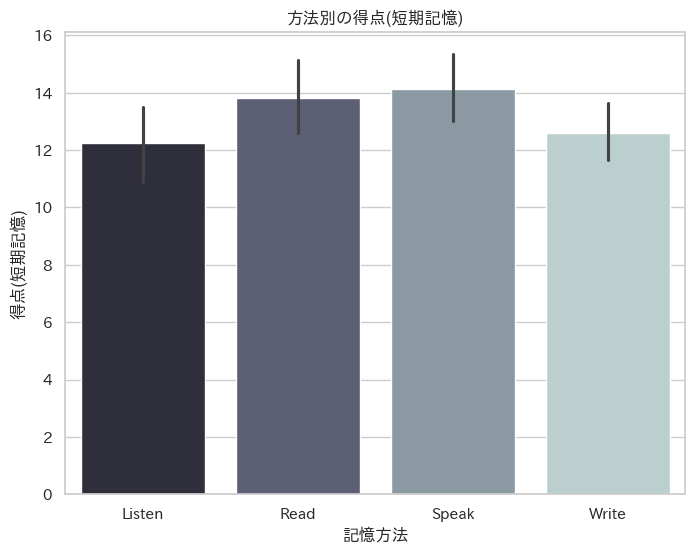

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(8, 6))

# 棒グラフ (平均値) を描画
# デフォルトの95%信頼区間エラーバーが描画
sns.barplot(
    data=df_final_long,
    x='Method',
    y='ShortTerm',
    palette='bone'
)

plt.title('方法別の得点(短期記憶)')
plt.xlabel('記憶方法')
plt.ylabel('得点(短期記憶)')
plt.show()

### ***長期記憶***

問い: 「48時間後（長期記憶）において、4つの記憶方法（Method）の間に得点の差はあるか？」


わかること: どの方法が「記憶の定着（長期保持）」に最も強いかがわかる。

In [ ]:
# 分析2: LongTerm
# ---------------------------------

# AnovaRMを実行
aov_long = AnovaRM(
    data=df_final_long,
    depvar='LongTerm',          # 従属変数
    subject='Participant_ID',   # 被験者ID
    within=['Method']
)

# 結果のサマリーを表示
fit_long = aov_long.fit()
print(fit_long.summary())

                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
Method  1.9812 3.0000 120.0000 0.1204



/tmp/ipython-input-1027115188.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


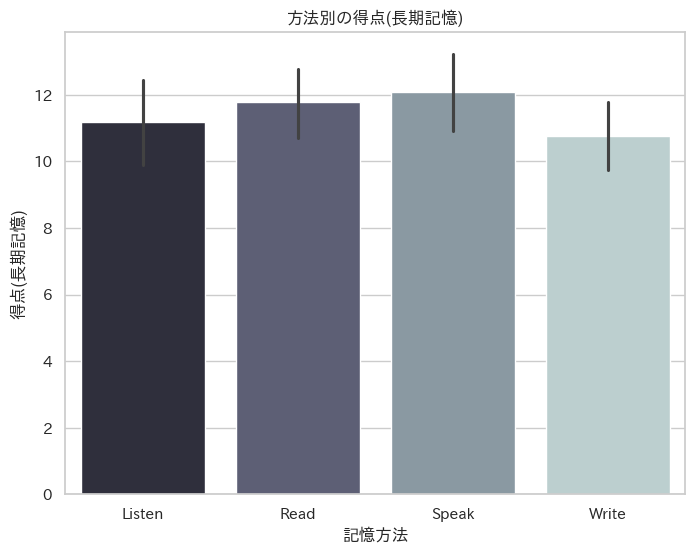

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# 棒グラフ (平均値) を描画
# デフォルトの95%信頼区間エラーバーが描画
sns.barplot(
    data=df_final_long,
    x='Method',
    y='LongTerm',
    palette='bone'
)

plt.title('方法別の得点(長期記憶)')
plt.xlabel('記憶方法')
plt.ylabel('得点(長期記憶)')
plt.show()

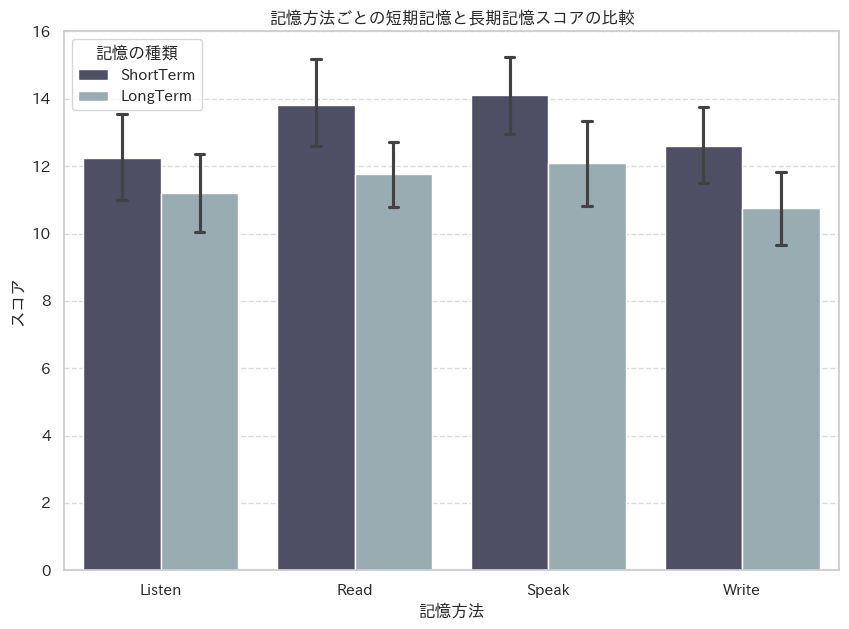

In [ ]:
# ShortTermとLongTermのデータだけを抽出してmeltする
df_melted = df_final_long.melt(
    id_vars=['Participant_ID', 'WMC', 'Method'],
    value_vars=['ShortTerm', 'LongTerm'],
    var_name='MemoryType', # 'ShortTerm'または'LongTerm'が入る
    value_name='Score'      # 実際のスコアが入る
)

plt.figure(figsize=(10, 7))
sns.barplot(
    data=df_melted,
    x='Method',
    y='Score',
    hue='MemoryType', # MemoryTypeで棒を分ける
    palette='bone', # カラーパレットの指定
    capsize=0.1 # エラーバーのキャップサイズ
)

plt.title('記憶方法ごとの短期記憶と長期記憶スコアの比較')
plt.xlabel('記憶方法')
plt.ylabel('スコア')
plt.legend(title='記憶の種類')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### ***負荷***

In [ ]:
# 分析3: 負荷
# ---------------------------------

# AnovaRMを実行
aov_long = AnovaRM(
    data=df_final_long,
    depvar='Load',          # 従属変数
    subject='Participant_ID',   # 被験者ID
    within=['Method']
)

# 結果のサマリーを表示
fit_long = aov_long.fit()
print(fit_long.summary())

                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
Method  7.4529 3.0000 120.0000 0.0001



/tmp/ipython-input-605073953.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


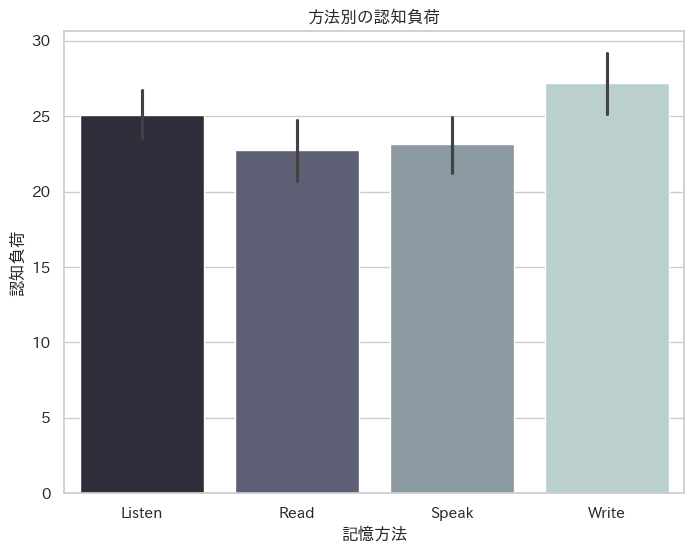

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

# 棒グラフ (平均値) を描画
# デフォルトの95%信頼区間エラーバーが描画
sns.barplot(
    data=df_final_long,
    x='Method',
    y='Load',
    palette='bone'
)

plt.title('方法別の認知負荷')
plt.xlabel('記憶方法')
plt.ylabel('認知負荷')
plt.show()

## ***多重比較***

In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg

# ----------------------------------
# 分析1: ShortTerm の多重比較
# (LongTermは ANOVAで有意差がなかったため、行わない)
# ----------------------------------

# pg.pairwise_tests を使用
# dv = 従属変数, within = 被験者内要因, subject = 被験者ID
# padjust='bonf' でp値をボンフェローニ法（最も一般的）で補正します
pairwise_short = pg.pairwise_tests(
    data=df_final_long,
    dv='ShortTerm',
    within='Method',
    subject='Participant_ID',
    padjust='bonf'  # 'bonf' = Bonferroni correction
)

# 結果の表示
# 'p-corr' (補正済みp値) が 0.05 を下回っているペアを探します
print(pairwise_short.to_markdown(index=False, numalign="left", stralign="left"))

| Contrast   | A      | B     | Paired   | Parametric   | T         | dof   | alternative   | p-unc      | p-corr    | p-adjust   | BF10   | hedges     |
|:-----------|:-------|:------|:---------|:-------------|:----------|:------|:--------------|:-----------|:----------|:-----------|:-------|:-----------|
| Method     | Listen | Read  | True     | True         | -2.59533  | 40    | two-sided     | 0.0131495  | 0.078897  | bonf       | 3.201  | -0.367948  |
| Method     | Listen | Speak | True     | True         | -3.20139  | 40    | two-sided     | 0.00268034 | 0.0160821 | bonf       | 12.664 | -0.459749  |
| Method     | Listen | Write | True     | True         | -0.716564 | 40    | two-sided     | 0.477806   | 1         | bonf       | 0.215  | -0.0934456 |
| Method     | Read   | Speak | True     | True         | -0.723364 | 40    | two-sided     | 0.473665   | 1         | bonf       | 0.216  | -0.071479  |
| Method     | Read   | Write | True     | True         | 2.43008   | 40    

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Write vs. Speak: Custom statistical test, P_val:1.020e-07
Read vs. Speak: Custom statistical test, P_val:3.900e-03
Listen vs. Speak: Custom statistical test, P_val:3.000e-04


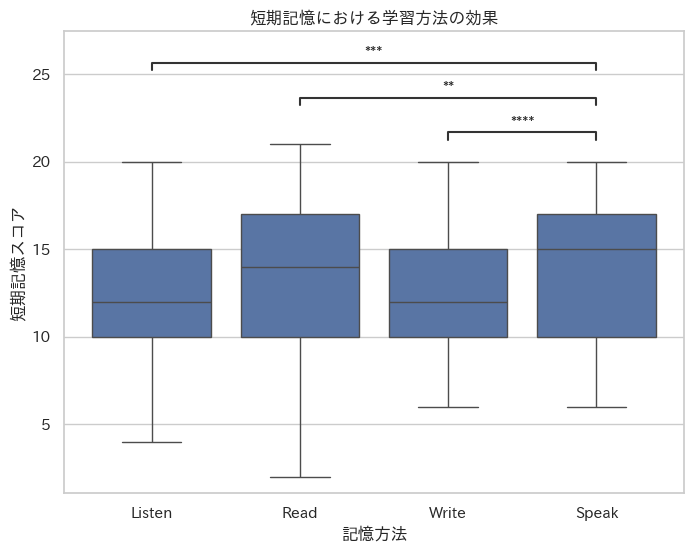

In [ ]:
from statannotations.Annotator import Annotator

# プロットの作成
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df_final_long, x='Method', y='ShortTerm', order=['Listen', 'Read', 'Write', 'Speak'])

# 比較したいペア（有意差が出たものだけ指定するとスッキリします）
pairs = [("Speak", "Listen"), ("Speak", "Read"), ("Speak", "Write")]

# Annotatorの設定
annotator = Annotator(ax, pairs, data=df_final_long, x='Method', y='ShortTerm', order=['Listen', 'Read', 'Write', 'Speak'])
annotator.configure(test=None, text_format='star', loc='inside') # text_format='star' で * 表示
annotator.set_pvalues([0.0003, 0.0039, 1.02e-07]) # ここに先ほどの p-corr を入力

annotator.annotate()

plt.title("短期記憶における学習方法の効果")
plt.xlabel('記憶方法')
plt.ylabel('短期記憶スコア')
plt.show()

有意となったペアに鉤括弧をつけている。

## ***相関分析***

### ***短期記憶「努力 vs 結果」の相関（負荷とスコア）***

問い: 「主観的認知負荷（Load）と、長期記憶スコア（LongTerm）の間に関係はあるか？

In [ ]:
from scipy.stats import pearsonr
import numpy as np

print("--- 相関分析1: 認知負荷(Load) vs 短期記憶(ShortTerm) ---")

# 1. Method(方法) ごとに Load と ShortTerm の平均値を計算
df_method_means = df_final_long.groupby('Method')[['Load', 'ShortTerm']].mean()

print("\n[方法ごとの平均値]")
print(df_method_means.to_markdown(numalign="left", stralign="left"))

# 2. ピアソンの相関分析を実行
#    (Loadの平均値 vs ShortTermの平均値)
correlation, p_value = pearsonr(df_method_means['Load'], df_method_means['ShortTerm'])

print(f"\n[相関の結果]")
print(f"  相関係数 (r): {correlation:.4f}")
print(f"  p値 (p-value): {p_value:.4f}")

--- 相関分析1: 認知負荷(Load) vs 短期記憶(ShortTerm) ---

[方法ごとの平均値]
| Method   | Load    | ShortTerm   |
|:---------|:--------|:------------|
| Listen   | 25.0732 | 12.2439     |
| Read     | 22.7317 | 13.8293     |
| Speak    | 23.122  | 14.122      |
| Write    | 27.2195 | 12.6098     |

[相関の結果]
  相関係数 (r): -0.8023
  p値 (p-value): 0.1977


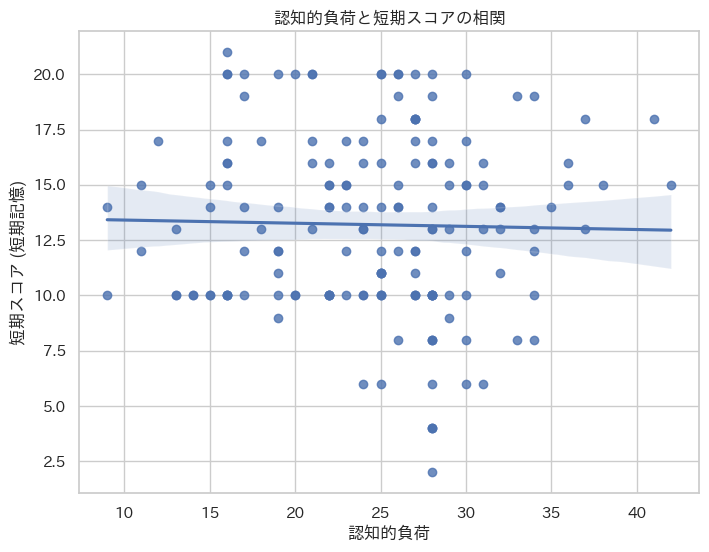

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# グラフのスタイルとサイズを指定
# sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

# regplot を使用
# data: 全体の縦長データ (N=120)
# x: 認知負荷
# y: 短期記憶スコア
sns.regplot(
    data=df_final_long,
    x='Load',
    y='ShortTerm' # LongTerm から ShortTerm に変更
)

plt.title('認知的負荷と短期スコアの相関') # タイトルを更新
plt.xlabel('認知的負荷')
plt.ylabel('短期スコア (短期記憶)') # Y軸ラベルを更新
plt.show()

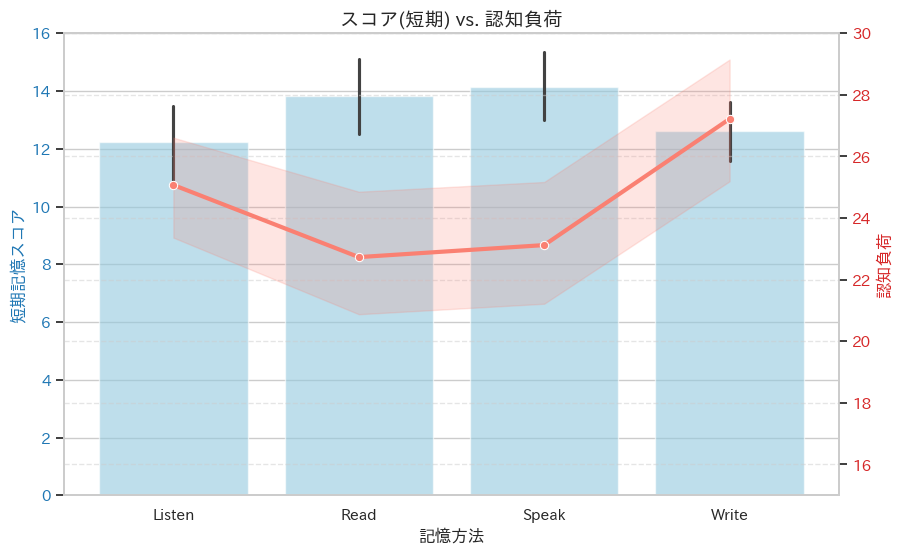

In [ ]:
# プロットの作成
fig, ax1 = plt.subplots(figsize=(10, 6))

# カラー設定
color_bar = 'skyblue'
color_line = 'salmon'

# 第1軸（左側）：短期記憶スコア（棒グラフ）
# 成果を表すので、土台となる棒グラフにします
sns.barplot(data=df_final_long, x='Method', y='ShortTerm', color=color_bar, ax=ax1, alpha=0.6)
ax1.set_ylabel('短期記憶スコア', color='tab:blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('記憶方法', fontsize=12)
ax1.set_ylim(0, 16)  # グラフのバランス調整

# 第2軸（右側）：認知負荷（折れ線グラフ）
# コストの推移を表すので、上を走る折れ線にします
ax2 = ax1.twinx()
sns.lineplot(data=df_final_long, x='Method', y='Load', color=color_line, marker='o', linewidth=3, ax=ax2, sort=False)
ax2.set_ylabel('認知負荷', color='tab:red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(15, 30)  # 変動が見えやすいように範囲調整

plt.title('スコア(短期) vs. 認知負荷', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### ***長期記憶「努力 vs 結果」の相関（負荷とスコア）***

「大変な（負荷が高い）勉強法ほど、本当に記憶に定着するのか？」を検証


見るべきペア: Load と LongTerm

問い: 「主観的認知負荷（Load）と、長期記憶スコア（LongTerm）の間に関係はあるか？」

In [ ]:
from scipy.stats import pearsonr
import numpy as np

print("--- 相関分析1: 認知負荷(Load) vs 長期記憶(LongTerm) ---")

# 1. Method(方法) ごとに Load と LongTerm の平均値を計算
df_method_means = df_final_long.groupby('Method')[['Load', 'LongTerm']].mean()

print("\n[方法ごとの平均値]")
print(df_method_means.to_markdown(numalign="left", stralign="left"))

# 2. ピアソンの相関分析を実行
#    (Loadの平均値 vs LongTermの平均値)
correlation, p_value = pearsonr(df_method_means['Load'], df_method_means['LongTerm'])

print(f"\n[相関の結果]")
print(f"  相関係数 (r): {correlation:.4f}")
print(f"  p値 (p-value): {p_value:.4f}")

--- 相関分析1: 認知負荷(Load) vs 長期記憶(LongTerm) ---

[方法ごとの平均値]
| Method   | Load    | LongTerm   |
|:---------|:--------|:-----------|
| Listen   | 25.0732 | 11.1951    |
| Read     | 22.7317 | 11.7805    |
| Speak    | 23.122  | 12.0976    |
| Write    | 27.2195 | 10.7561    |

[相関の結果]
  相関係数 (r): -0.9486
  p値 (p-value): 0.0514


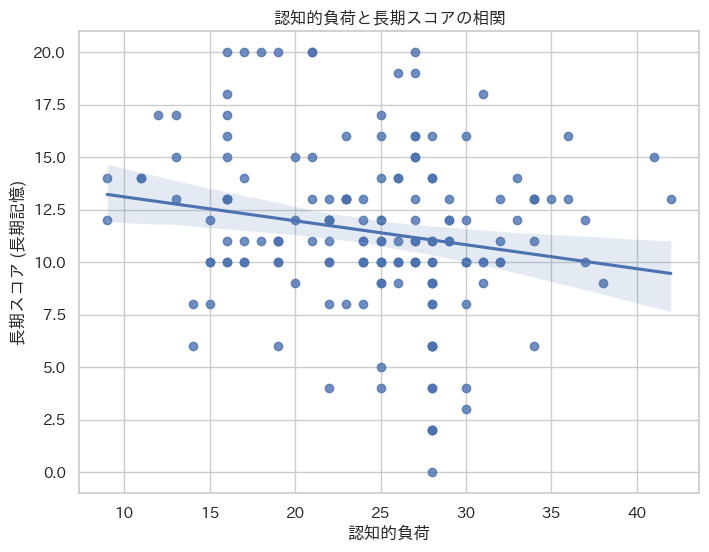

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# グラフのスタイルとサイズを指定
# sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

# regplot を使用
# data: 全体の縦長データ (N=120)
# x: 認知負荷
# y: 長期記憶スコア
sns.regplot(
    data=df_final_long,
    x='Load',
    y='LongTerm'
)

plt.title('認知的負荷と長期スコアの相関')
plt.xlabel('認知的負荷')
plt.ylabel('長期スコア (長期記憶)')
plt.show()

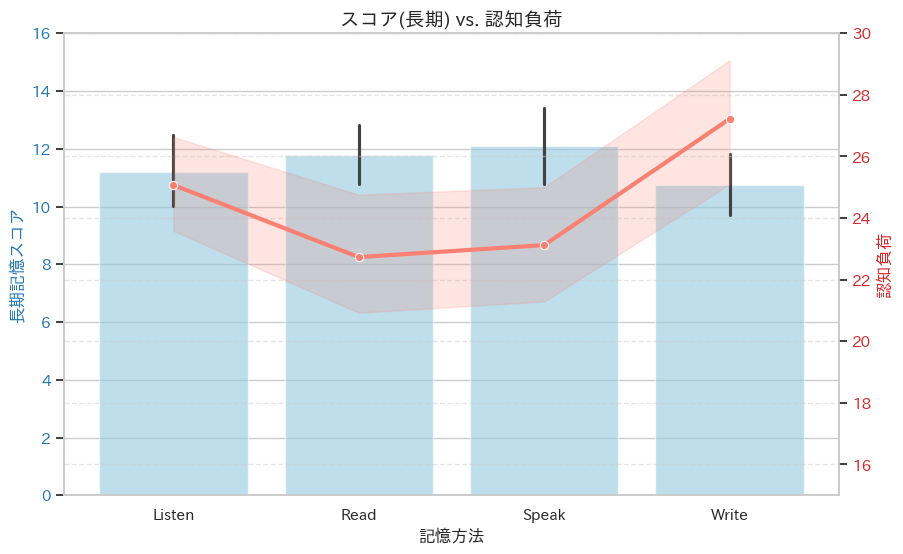

In [ ]:
# プロットの作成
fig, ax1 = plt.subplots(figsize=(10, 6))

# カラー設定
color_bar = 'skyblue'
color_line = 'salmon'

# 第1軸（左側）：長期記憶スコア（棒グラフ）
# 成果を表すので、土台となる棒グラフにします
sns.barplot(data=df_final_long, x='Method', y='LongTerm', color=color_bar, ax=ax1, alpha=0.6)
ax1.set_ylabel('長期記憶スコア', color='tab:blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('記憶方法', fontsize=12)
ax1.set_ylim(0, 16)  # グラフのバランス調整

# 第2軸（右側）：認知負荷（折れ線グラフ）
# コストの推移を表すので、上を走る折れ線にします
ax2 = ax1.twinx()
sns.lineplot(data=df_final_long, x='Method', y='Load', color=color_line, marker='o', linewidth=3, ax=ax2, sort=False)
ax2.set_ylabel('認知負荷', color='tab:red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(15, 30)  # 変動が見えやすいように範囲調整

plt.title('スコア(長期) vs. 認知負荷', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

書くのコスパの悪さがわかる。

### ***「個人の地力 vs 結果」の相関（WMCと長期スコア）***

In [ ]:
print("--- 相関分析2: WMC vs 長期記憶(LongTerm) ---")

# 1. Participant_ID(被験者) ごとに WMC と LongTerm の平均値を計算
#    (WMCは被験者ごとで一定なので、mean()でもfirst()でも同じ値になる)
df_participant_means = df_final_long.groupby('Participant_ID')[['WMC', 'LongTerm']].mean()

# print("\n[被験者ごとの平均値 (先頭5名)]")
# print(df_participant_means.head().to_markdown(numalign="left", stralign="left"))

# 2. ピアソンの相関分析を実行
#    (WMC vs LongTermの平均値)
correlation, p_value = pearsonr(df_participant_means['WMC'], df_participant_means['LongTerm'])

print(f"\n[相関の結果]")
print(f"  相関係数 (r): {correlation:.4f}")
print(f"  p値 (p-value): {p_value:.4f}")

--- 相関分析2: WMC vs 長期記憶(LongTerm) ---

[相関の結果]
  相関係数 (r): 0.1582
  p値 (p-value): 0.3232


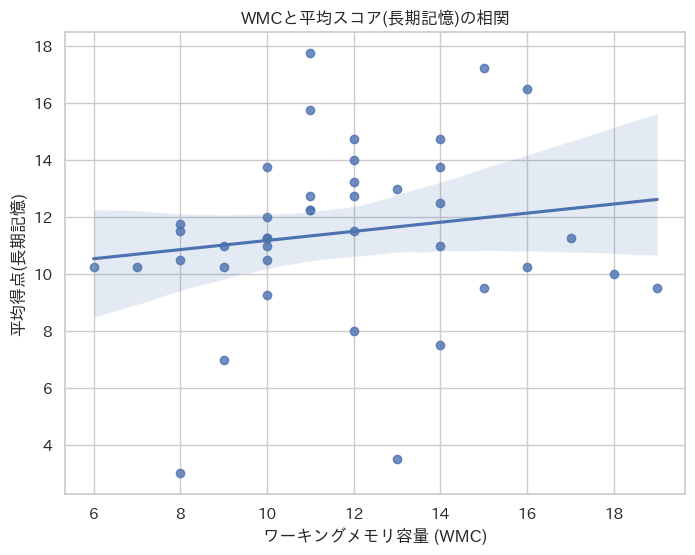

In [ ]:
# まず、被験者ごとの平均値データ (N=30) を再作成します
df_participant_means = df_final_long.groupby('Participant_ID')[['WMC', 'LongTerm']].mean()

# グラフのスタイルとサイズを指定
plt.figure(figsize=(8, 6))

# regplot を使用
# data: 被験者ごとの平均データ (N=30)
# x: WMC
# y: 長期記憶スコアの平均値
sns.regplot(
    data=df_participant_means,
    x='WMC',
    y='LongTerm'
)

plt.title('WMCと平均スコア(長期記憶)の相関')
plt.xlabel('ワーキングメモリ容量 (WMC)')
plt.ylabel('平均得点(長期記憶)')
plt.show()

有意差がある。

## ***重回帰分析***

### ***短期記憶モデル***

$$ShortTerm\_Score \approx \alpha_0 + \alpha_1(WMC) + \alpha_2(Load) + \alpha_3(Method)$$

これが解明する問い:「そもそも、"学習直後"の成績（短期記憶）は何によって決まるのか？」

In [ ]:
import statsmodels.formula.api as smf

print("--- モデル1: ShortTerm ~ WMC + Load + C(Method) ---")

# 1. モデルの式を定義
#    Y ~ X1 + X2 + C(X3)
#    C(Method) は、Methodをカテゴリ変数として扱う（ダミー変数化）指示
formula_short = "ShortTerm ~ WMC + Load + C(Method)"

# 2. 混合効果モデル (MixedLM) を作成
#    groups=... で「参加者ごとのクセ」を考慮する
model_short = smf.mixedlm(
    formula=formula_short,
    data=df_final_long,
    groups=df_final_long["Participant_ID"]
)

# 3. モデルの学習（推定）を実行
results_short = model_short.fit()

# 4. 結果のサマリーを表示
print(results_short.summary())

--- モデル1: ShortTerm ~ WMC + Load + C(Method) ---
            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   ShortTerm
No. Observations:   164       Method:               REML     
No. Groups:         41        Scale:                5.6725   
Min. group size:    4         Log-Likelihood:       -417.8683
Max. group size:    4         Converged:            Yes      
Mean group size:    4.0                                      
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          12.621    2.515  5.018 0.000  7.691 17.551
C(Method)[T.Read]   1.546    0.535  2.888 0.004  0.497  2.595
C(Method)[T.Speak]  1.845    0.532  3.465 0.001  0.802  2.889
C(Method)[T.Write]  0.402    0.534  0.753 0.451 -0.644  1.448
WMC                 0.004    0.181  0.022 0.982 -0.351  0.359
Load               -0.017    0.04

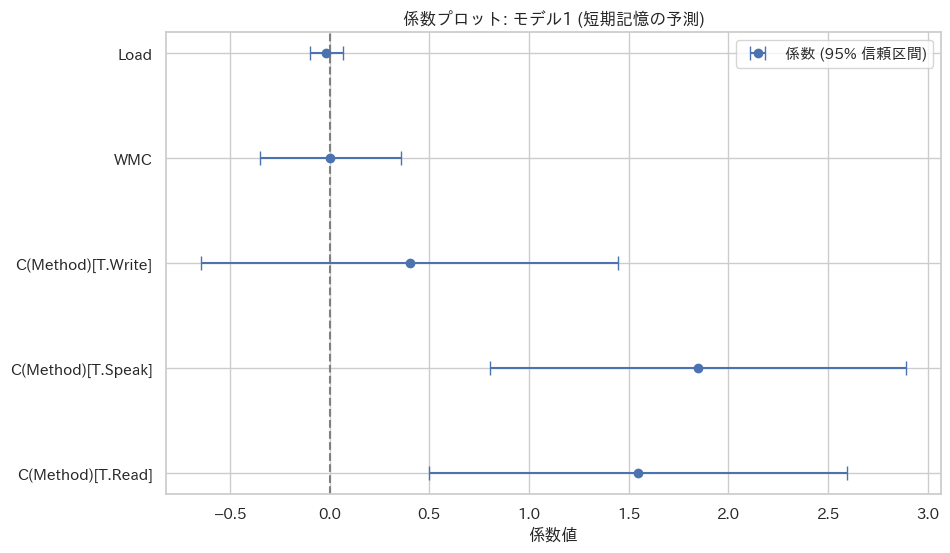

In [ ]:
# --- 1. モデル結果からサマリーテーブルをDataFrameとして取得 ---
# results_short.summary().tables[1] が係数のテーブル
results_df = results_short.summary().tables[1]

# インデックスをリセットして、変数名を 'Variable' という列にする
results_df = results_df.reset_index()
results_df = results_df.rename(columns={'index': 'Variable'})

# 列名を整理
results_df = results_df.rename(columns={
    'P>|z|': 'P',
    '[0.025': 'Lower_CI',
    '0.975]': 'Upper_CI'
})

# 'Intercept'（切片）と 'Group Var' を除外
results_df = results_df[~results_df['Variable'].isin(['Intercept', 'Group Var'])]

# 数値列をfloatに変換
results_df[['Coef.', 'Lower_CI', 'Upper_CI', 'P']] = results_df[['Coef.', 'Lower_CI', 'Upper_CI', 'P']].astype(float)

# --- 2. グラフの描画 ---
plt.figure(figsize=(10, 6))

# 変数のリスト（Y軸）
y_pos = np.arange(len(results_df['Variable']))
# 係数の値（点）
x_vals = results_df['Coef.']
# エラーバー（95%信頼区間）
# Lower_CI と Upper_CI の差分として計算
x_err_lower = results_df['Coef.'] - results_df['Lower_CI']
x_err_upper = results_df['Upper_CI'] - results_df['Coef.']
x_err = [x_err_lower, x_err_upper]

plt.errorbar(
    x_vals,
    y_pos,
    xerr=x_err,
    fmt='o',  # 'o' = 点
    capsize=5, # エラーバーの「傘」のサイズ
    linestyle='None', # 点同士を結ぶ線はなし
    label='係数 (95% 信頼区間)'
)

# ゼロの垂直線
plt.axvline(x=0, color='grey', linestyle='--')

# グラフの体裁
plt.yticks(y_pos, results_df['Variable']) # Y軸に変数名
plt.xlabel('係数値')
plt.title('係数プロット: モデル1 (短期記憶の予測)')
plt.legend()
plt.show()

### ***長期記憶モデル***

$$LongTerm\_Score \approx \beta_0 + \beta_1(WMC) + \beta_2(Load) + \beta_3(Method)$$

これが解明する問い: 「48時間後の"記憶の定着"に、どの要因が最も効いているのか？」

In [ ]:
print("--- モデル2: LongTerm ~ WMC + Load + C(Method) ---")

# 1. モデルの式を定義
formula_long = "LongTerm ~ WMC + Load + C(Method)"

# 2. 混合効果モデル (MixedLM) を作成
model_long = smf.mixedlm(
    formula=formula_long,
    data=df_final_long,
    groups=df_final_long["Participant_ID"]
)

# 3. モデルの学習（推定）を実行
results_long = model_long.fit()

# 4. 結果のサマリーを表示
print(results_long.summary())

--- モデル2: LongTerm ~ WMC + Load + C(Method) ---
            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   LongTerm 
No. Observations:   164       Method:               REML     
No. Groups:         41        Scale:                7.0034   
Min. group size:    4         Log-Likelihood:       -425.9338
Max. group size:    4         Converged:            Yes      
Mean group size:    4.0                                      
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          12.860    2.365  5.437 0.000  8.224 17.496
C(Method)[T.Read]   0.294    0.594  0.494 0.621 -0.871  1.458
C(Method)[T.Speak]  0.659    0.591  1.115 0.265 -0.499  1.818
C(Method)[T.Write] -0.172    0.593 -0.289 0.772 -1.333  0.990
WMC                 0.124    0.161  0.771 0.441 -0.192  0.441
Load               -0.125    0.045

### ***改善版モデル(長期記憶の予測)***

$$LongTerm\_Score \approx \beta_0 + \beta_1(WMC) + \beta_2(Load) + \beta_3(Method) + \beta_4(ShortTerm\_Score)$$

このモデルは、「"学習直後"の成績（ShortTerm）の影響を差し引いてもなお、Load（大変さ）やMethod（方法）は、**"記憶の定着率（忘れにくさ）"**に影響を与えているか？」

→　ShortTerm（直後の成績）を説明変数に入れたことで、「一度頭に入った知識が、どれだけ抜け落ちにくいか（定着率）」 を見

In [ ]:
print("--- 改善版モデル2: LongTerm ~ ShortTerm + WMC + Load + C(Method) ---")

# 1. モデルの式を定義
#    ShortTerm を予測要因（説明変数）として追加
formula_long_improved = "LongTerm ~ ShortTerm + WMC + Load + C(Method)"

# 2. 混合効果モデル (MixedLM) を作成
model_long_improved = smf.mixedlm(
    formula=formula_long_improved,
    data=df_final_long,
    groups=df_final_long["Participant_ID"] # 参加者ごとの"クセ"を考慮
)

# 3. モデルの学習（推定）を実行
results_long_improved = model_long_improved.fit()

# 4. 結果のサマリーを表示
print(results_long_improved.summary())

--- 改善版モデル2: LongTerm ~ ShortTerm + WMC + Load + C(Method) ---
            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   LongTerm 
No. Observations:   164       Method:               REML     
No. Groups:         41        Scale:                6.5643   
Min. group size:    4         Log-Likelihood:       -406.5283
Max. group size:    4         Converged:            Yes      
Mean group size:    4.0                                      
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           5.976    1.954  3.059 0.002  2.147  9.805
C(Method)[T.Read]  -0.519    0.584 -0.889 0.374 -1.664  0.626
C(Method)[T.Speak] -0.315    0.586 -0.538 0.591 -1.465  0.834
C(Method)[T.Write] -0.397    0.573 -0.693 0.488 -1.520  0.726
ShortTerm           0.534    0.072  7.423 0.000  0.393  0.675
WMC                

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import zscore

# 1. データを標準化（Zスコア化）する
# 数値データのみ標準化します
cols_to_standardize = ['ShortTerm', 'LongTerm', 'WMC', 'Load']
df_std = df_final_long.copy()
df_std[cols_to_standardize] = df_std[cols_to_standardize].apply(zscore)

# ---------------------------------------------------------
# 2. ベータの算出
# ---------------------------------------------------------

# ① 左の矢印 (WMC -> ShortTerm)
model_1 = smf.ols('ShortTerm ~ WMC', data=df_std).fit()
beta_wmc = model_1.params['WMC']
print(f"Arrow 1 (WMC -> Short): beta = {beta_wmc:.2f}")

# ② 右の矢印 (ShortTerm -> LongTerm)
# Methodの影響も考慮(制御)しつつ、ShortTermの影響を見る
model_2 = smf.ols('LongTerm ~ ShortTerm + C(Method)', data=df_std).fit()
beta_short = model_2.params['ShortTerm']
print(f"Arrow 2 (Short -> Long): beta = {beta_short:.2f}")

Arrow 1 (WMC -> Short): beta = 0.01
Arrow 2 (Short -> Long): beta = 0.63


| 表記 | P値（確率） | 意味ニュアンス |
| :--- | :--- | :--- |
| n.s. | $p \ge .05$ | Not Significant 有意差なし（偶然の範囲内） |
| * | $p < .05$ | 5%水準で有意「統計的に意味がある差と言える」 |
| ** | $p < .01$ | 1%水準で有意「かなり確かな差がある」 |
| *** | $p < .001$ | 0.1%水準で有意「極めて強い差がある（ほぼ間違いなく偶然ではない）」 |

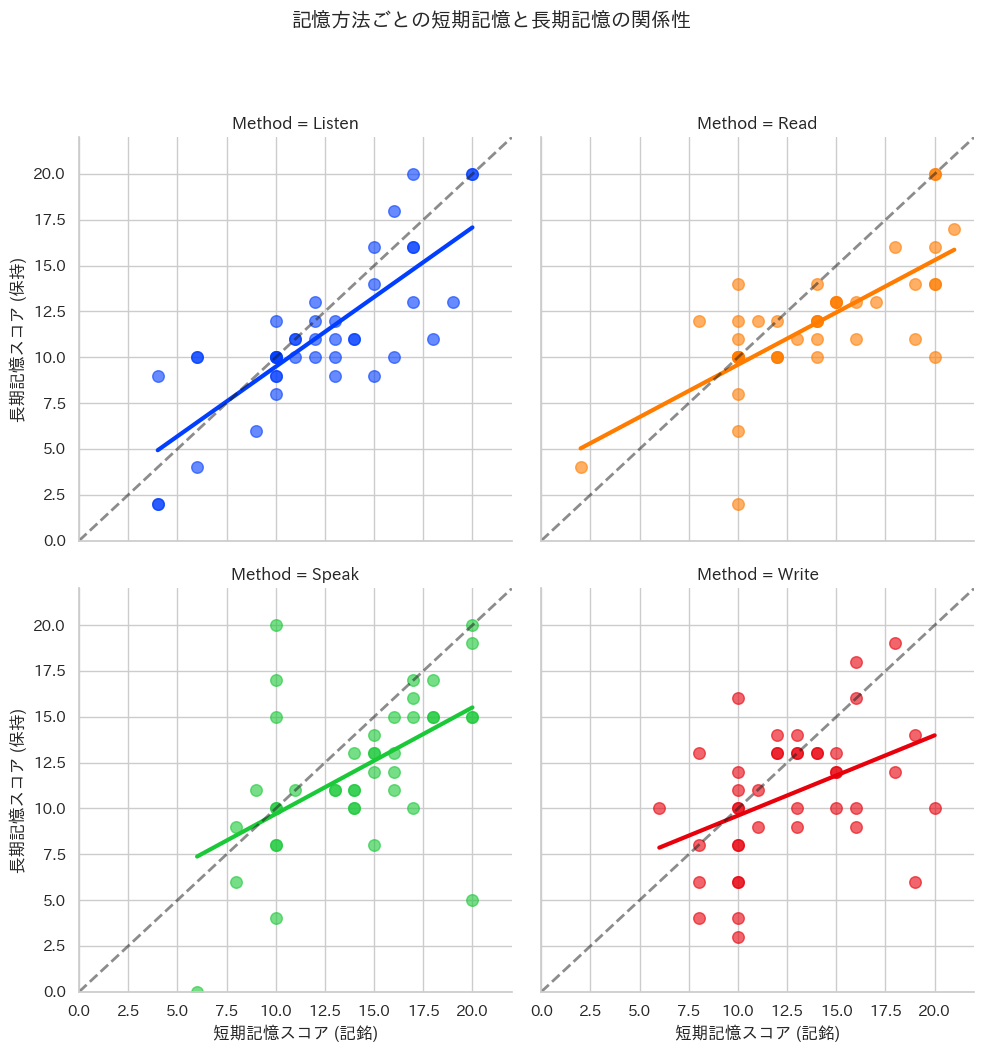

In [ ]:
# カラーパレットを定義（視認性を高めるため少し濃い色に）
colors = sns.color_palette("bright", 4)
method_colors = dict(zip(['Listen', 'Read', 'Speak', 'Write'], colors))

# グラフの作成（col='Method' で分割します）
g = sns.lmplot(
    data=df_final_long,
    x='ShortTerm',
    y='LongTerm',
    hue='Method',    # 色分けも併用
    col='Method',    # 【重要】ここを変更：手法ごとに列を分ける
    col_wrap=2,      # 2列で折り返す（4つ横並びが良ければcol_wrap=4に）
    palette=method_colors,
    height=5,        # 1つあたりのグラフの高さ
    aspect=1,        # アスペクト比（正方形が見やすい）
    ci=None,         # 信頼区間は表示しない（スッキリさせるため）
    scatter_kws={'alpha': 0.6, 's': 70}, # 点の透明度と大きさ
    line_kws={'linewidth': 3} # 線の太さ
)

# 各サブプロットに「忘却ゼロライン（y=x）」を追加する処理
max_val = max(df_final_long['ShortTerm'].max(), df_final_long['LongTerm'].max()) + 1
for ax in g.axes.flat:
    ax.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=2, label='忘却ゼロライン (y=x)')
    ax.set_xlim(0, max_val)
    ax.set_ylim(0, max_val)

# 全体のタイトルなどを調整
g.fig.suptitle('記憶方法ごとの短期記憶と長期記憶の関係性', y=1.05)
g.set_axis_labels("短期記憶スコア (記銘)", "長期記憶スコア (保持)")

plt.tight_layout()
plt.show()

記憶の保持率

$$RetentionRate = \frac{LongTerm}{ShortTerm} \times 100$$

/tmp/ipython-input-1964830226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final_long, x='Method', y='RetentionRate', capsize=.1, palette="bone", legend=False)


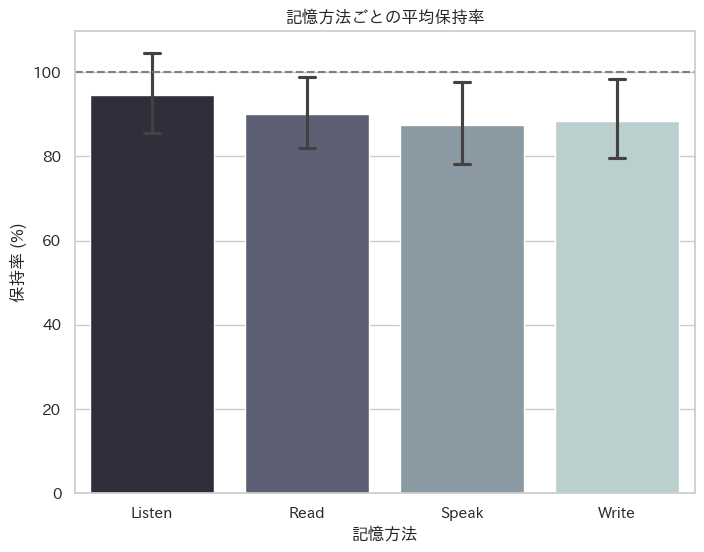

In [ ]:
# 保持率の計算（0除算回避のためShortTermが0の場合は除外などの処理が必要ですが、今回は簡易的に）
df_final_long['RetentionRate'] = (df_final_long['LongTerm'] / df_final_long['ShortTerm']) * 100

# 棒グラフ
plt.figure(figsize=(8, 6))
sns.barplot(data=df_final_long, x='Method', y='RetentionRate', capsize=.1, palette="bone", legend=False)
plt.title("記憶方法ごとの平均保持率")
plt.ylabel("保持率 (%)")
plt.xlabel("記憶方法")
plt.axhline(100, color='gray', linestyle='--') # 100%ライン
plt.show()

# ***参考***

## ***WMCのグルーピング***

ここではWMCのスコアによって被験者を「高郡」「低郡」に分ける。

つまりWMCを２値で扱う。

In [ ]:
# 1. WMCの中央値 (Median) を計算
wmc_median = df_final_long['WMC'].median()
print(f"WMCの中央値: {wmc_median}")

# 2. 中央値を使ってグループ分け (Median Split)
#    中央値「より大きい」 -> 'High' (高群)
#    中央値「以下」       -> 'Low'  (低群)
df_final_long['WMC_Group'] = np.where(df_final_long['WMC'] >= wmc_median, 'High', 'Low')
display(df_final_long[['Participant_ID', 'WMC', 'WMC_Group', 'Method']])

# 4. 各グループの人数の確認
unique_participants = df_final_long[['Participant_ID', 'WMC_Group']].drop_duplicates()
group_counts = unique_participants['WMC_Group'].value_counts()

print("\n[グループごとの人数]")
print(group_counts.to_markdown(numalign="left", stralign="left"))

WMCの中央値: 11.0


,Participant_ID,WMC,WMC_Group,Method
0,P01,9,Low,Listen
1,P01,9,Low,Read
2,P01,9,Low,Speak
3,P01,9,Low,Write
4,P02,12,High,Listen
...,...,...,...,...
159,P40,16,High,Write
160,P41,11,High,Listen
161,P41,11,High,Read
162,P41,11,High,Speak



[グループごとの人数]
| WMC_Group   | count   |
|:------------|:--------|
| High        | 25      |
| Low         | 16      |


--- 3-1. 記述統計: 各条件の平均値と標準偏差 ---
|                    | ('ShortTerm', 'mean')   | ('ShortTerm', 'std')   | ('LongTerm', 'mean')   | ('LongTerm', 'std')   | ('Load', 'mean')   | ('Load', 'std')   |
|:-------------------|:------------------------|:-----------------------|:-----------------------|:----------------------|:-------------------|:------------------|
| ('Listen', '低群') | 11.88                   | 3.38                   | 9.69                   | 3.16                  | 26.31              | 5.82              |
| ('Listen', '高群') | 12.48                   | 4.79                   | 12.16                  | 4.36                  | 24.28              | 4.92              |
| ('Read', '低群')   | 11.81                   | 3.69                   | 10.69                  | 2.09                  | 25.5               | 6.41              |
| ('Read', '高群')   | 15.12                   | 4.19                   | 12.48                  | 3.94                  | 20.96              | 6.22        

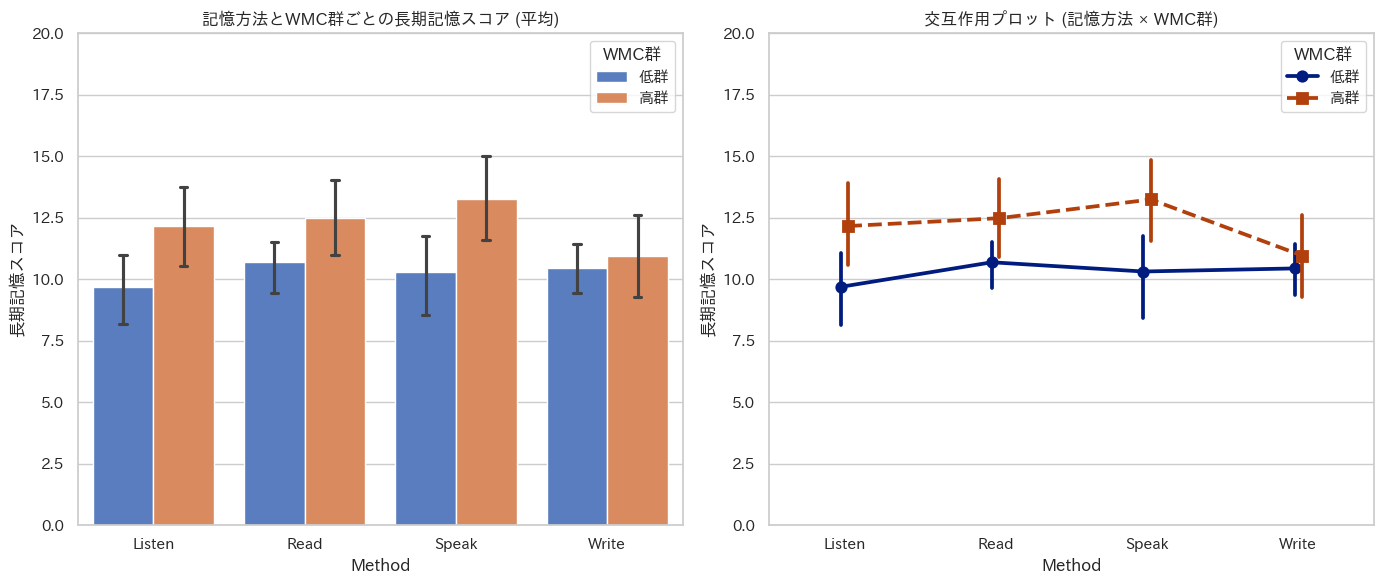

In [ ]:
# Temporarily map 'High' and 'Low' to Japanese for plotting
df_final_long_jp_wmc = df_final_long.copy()
df_final_long_jp_wmc['WMC_Group'] = df_final_long_jp_wmc['WMC_Group'].map({'High': '高群', 'Low': '低群'})


# -------------------------------------------------------
# 3-1. 記述統計表の作成 (Table 1用)
# -------------------------------------------------------
print("--- 3-1. 記述統計: 各条件の平均値と標準偏差 ---")

# Method x WMC_Group ごとの平均値(mean)と標準偏差(std)を一括計算
# numeric_only=True で数値列だけを対象にする
desc_stats = df_final_long_jp_wmc.groupby(['Method', 'WMC_Group'])[['ShortTerm', 'LongTerm', 'Load']].agg(['mean', 'std'])

# 小数点以下2桁に丸めて表示
print(desc_stats.round(2).to_markdown(numalign="left", stralign="left"))


# -------------------------------------------------------
# 3-2. 可視化: 長期記憶 (LongTerm) の交互作用プロット ---
# -------------------------------------------------------
print("\n--- 3-2. 可視化: 長期記憶 (LongTerm) の交互作用プロット ---")

# 図の枠組みを作成 (1行2列でグラフを並べる)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- (左) 集合棒グラフ (Bar Chart) ---
# 直感的に「高さ」の違いを比較しやすい
sns.barplot(
    data=df_final_long_jp_wmc, # Use the mapped DataFrame
    x='Method',
    y='LongTerm',
    hue='WMC_Group',
    palette='muted',
    capsize=0.1,
    ax=axes[0] # 左側に描画
)
axes[0].set_title("記憶方法とWMC群ごとの長期記憶スコア (平均)")
axes[0].set_ylabel("長期記憶スコア")
axes[0].set_ylim(0, 20) # 縦軸の範囲を固定 (見やすくするため)
# Update legend title
axes[0].legend(title='WMC群')


# --- (右) 交互作用図 (Point/Line Plot) ---
# 線がクロスしているか（交互作用があるか）を確認しやすい
sns.pointplot(
    data=df_final_long_jp_wmc, # Use the mapped DataFrame
    x='Method',
    y='LongTerm',
    hue='WMC_Group',
    palette='dark',
    markers=["o", "s"],
    linestyles=["-", "--"],
    dodge=True,
    ax=axes[1] # 右側に描画
)
axes[1].set_title("交互作用プロット (記憶方法 × WMC群)")
axes[1].set_ylabel("長期記憶スコア")
axes[1].set_ylim(0, 20)
# Update legend title
axes[1].legend(title='WMC群')

plt.tight_layout()
plt.show()


--- 3-2. 可視化: 短期記憶 (ShortTerm) の交互作用プロット ---


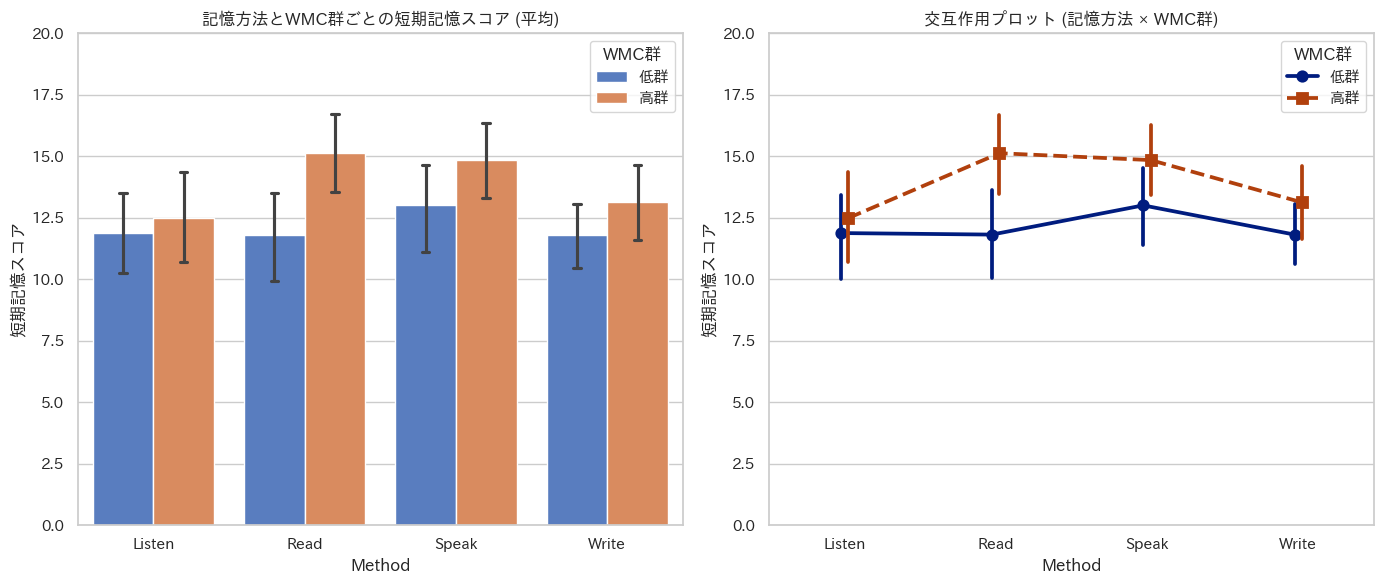

In [ ]:
print("\n--- 3-2. 可視化: 短期記憶 (ShortTerm) の交互作用プロット ---")

# 図の枠組みを作成 (1行2列でグラフを並べる)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- (左) 集合棒グラフ (Bar Chart) ---
# 直感的に「高さ」の違いを比較しやすい
sns.barplot(
    data=df_final_long_jp_wmc, # Use the mapped DataFrame
    x='Method',
    y='ShortTerm', # LongTerm から ShortTerm に変更
    hue='WMC_Group',
    palette='muted',
    capsize=0.1,
    ax=axes[0] # 左側に描画
)
axes[0].set_title("記憶方法とWMC群ごとの短期記憶スコア (平均)") # タイトルを更新
axes[0].set_ylabel("短期記憶スコア") # Y軸ラベルを更新
axes[0].set_ylim(0, 20) # 縦軸の範囲を固定 (見やすくするため)
# Update legend title
axes[0].legend(title='WMC群')


# --- (右) 交互作用図 (Point/Line Plot) ---
# 線がクロスしているか（交互作用があるか）を確認しやすい
sns.pointplot(
    data=df_final_long_jp_wmc, # Use the mapped DataFrame
    x='Method',
    y='ShortTerm', # LongTerm から ShortTerm に変更
    hue='WMC_Group',
    palette='dark',
    markers=["o", "s"],
    linestyles=["-", "--"],
    dodge=True,
    ax=axes[1] # 右側に描画
)
axes[1].set_title("交互作用プロット (記憶方法 × WMC群)") # タイトルを更新
axes[1].set_ylabel("短期記憶スコア") # Y軸ラベルを更新
axes[1].set_ylim(0, 20)
# Update legend title
axes[1].legend(title='WMC群')

plt.tight_layout()
plt.show()

### ***重回帰分析***

$$LongTerm \approx WMC\_Group \times Method + Load$$

In [ ]:
import statsmodels.formula.api as smf

print("--- 重回帰分析 (混合効果モデル): WMC群 × 記憶方法 の交互作用 ---")

# 1. モデルの定義
#    LongTerm (長期記憶) を予測する
#    C(WMC_Group) * C(Method) : グループと方法の「組み合わせ効果」を見る
#    + Load : 「大変さ」の影響も考慮に入れておく (共変量)
formula_grouped = "LongTerm ~ C(WMC_Group) * C(Method) + Load"

# 2. モデルの作成 (混合効果モデル)
#    groups="Participant_ID" で、個人ごとのばらつきを考慮
model_grouped = smf.mixedlm(
    formula=formula_grouped,
    data=df_final_long,
    groups=df_final_long["Participant_ID"]
)

# 3. 分析の実行
results_grouped = model_grouped.fit()

# 4. 結果の表示
print(results_grouped.summary())

--- 重回帰分析 (混合効果モデル): WMC群 × 記憶方法 の交互作用 ---
                      Mixed Linear Model Regression Results
Model:                      MixedLM         Dependent Variable:         LongTerm 
No. Observations:           164             Method:                     REML     
No. Groups:                 41              Scale:                      7.0703   
Min. group size:            4               Log-Likelihood:             -420.4968
Max. group size:            4               Converged:                  Yes      
Mean group size:            4.0                                                  
---------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------
Intercept                              13.994    1.434  9.757 0.000 11.183 16.805
C(WMC_Group)[T.Low]                     0.323    1.203  0.269 0.788 -2.035  2

## ***基本統計量の確認***

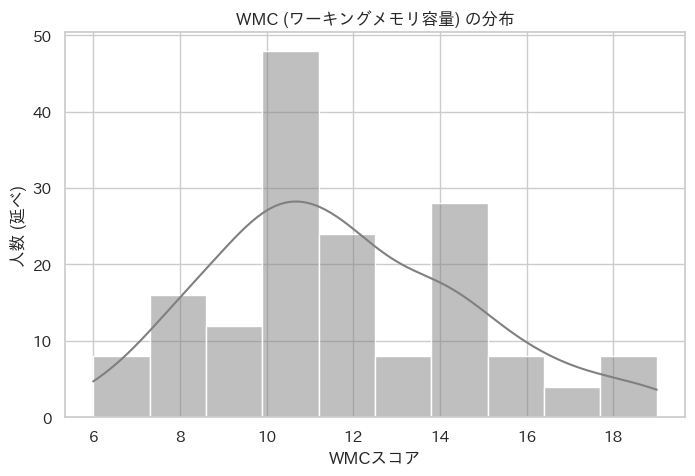

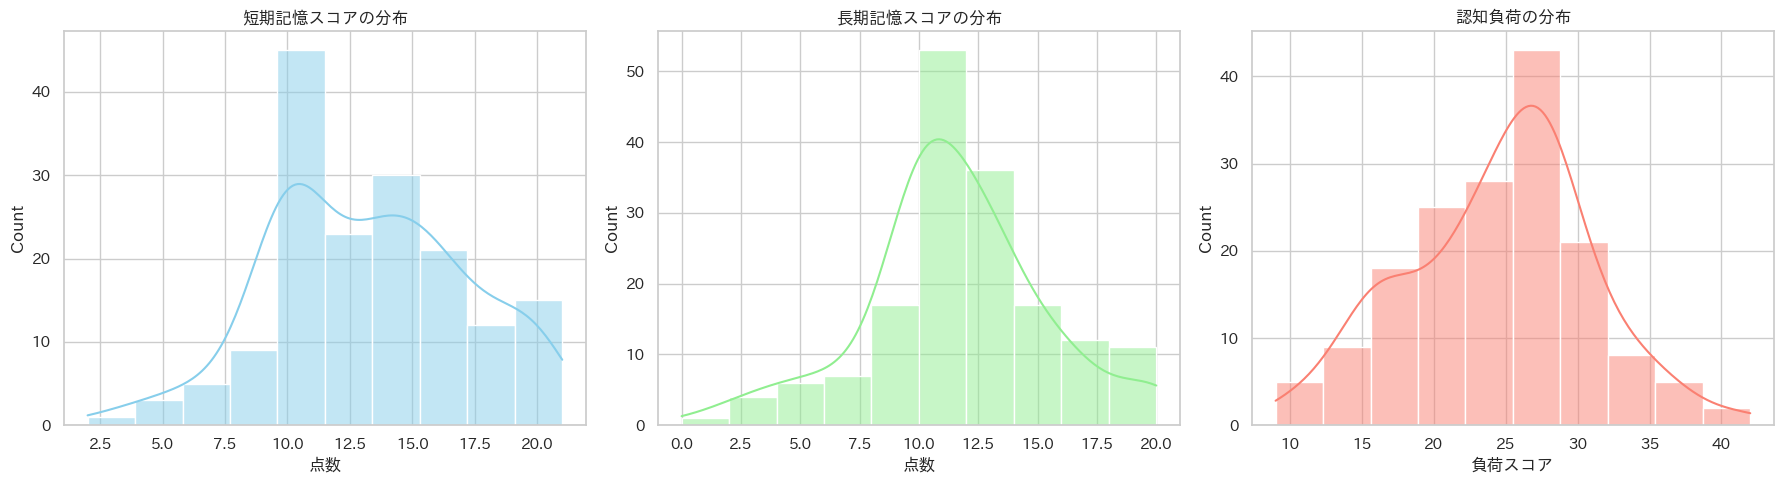

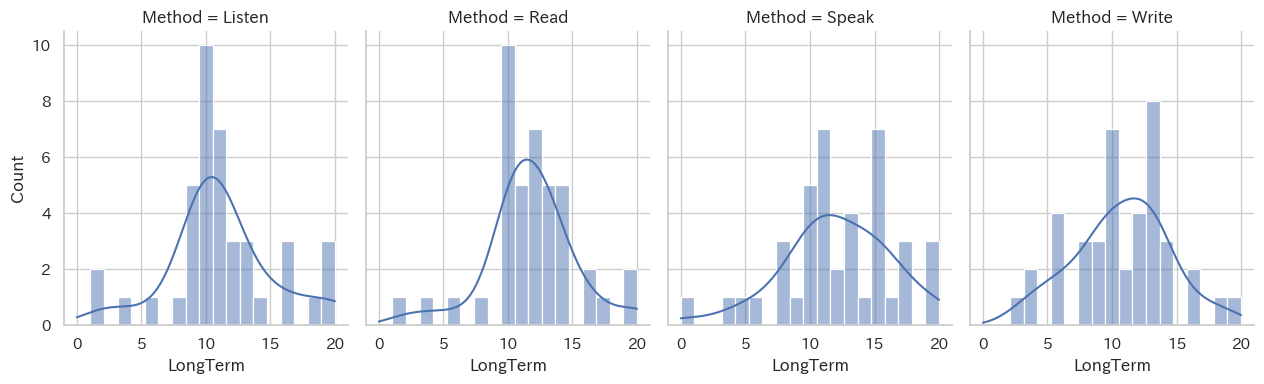

In [ ]:
# 1. WMC (個人の記憶容量) の分布
# -------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(data=df_final_long, x='WMC', kde=True, bins=10, color='gray')
plt.title('WMC (ワーキングメモリ容量) の分布')
plt.xlabel('WMCスコア')
plt.ylabel('人数 (延べ)')
plt.show()

# 2. スコアと負荷の分布 (まとめて表示)
# -------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ShortTerm (短期記憶)
sns.histplot(data=df_final_long, x='ShortTerm', kde=True, bins=10, color='skyblue', ax=axes[0])
axes[0].set_title('短期記憶スコアの分布')
axes[0].set_xlabel('点数')

# LongTerm (長期記憶)
sns.histplot(data=df_final_long, x='LongTerm', kde=True, bins=10, color='lightgreen', ax=axes[1])
axes[1].set_title('長期記憶スコアの分布')
axes[1].set_xlabel('点数')

# Cognitive_Load (認知負荷)
sns.histplot(data=df_final_long, x='Load', kde=True, bins=10, color='salmon', ax=axes[2])
axes[2].set_title('認知負荷の分布')
axes[2].set_xlabel('負荷スコア')

plt.tight_layout()
plt.show()

# 3. (応用) 記憶方法ごとの分布の違いを見る
# -------------------------------------------------------
# 「書く」だけ分布が違うかも？などをチェック
sns.displot(
    data=df_final_long,
    x='LongTerm',
    col='Method', # 方法ごとにグラフを分ける
    kde=True,
    height=4,
    aspect=0.8
)
plt.show()